In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
kf = KFold(n_splits=3, shuffle=True)

In [3]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()

In [4]:
clf = svm.SVC(probability=True)

In [5]:
file = open("C:/Users/1/Desktop/compounds_final.txt", "r", encoding="utf-8")
lines = file.readlines()

In [6]:
vectors = []
types = []

for line in lines:
    arr = []
    line = line.strip("\n")
    items = line.split("/")
    items_new = items[1:8]
    for item in items_new:
        arr.append(item)
    types.append(items[-1])
    vectors.append(arr)

In [7]:
print (vectors[:3])

[['Engel', '<NN>', 'no', 'Bild', '<+NN>', 'no', 's'], ['Wolke', '<NN>', 'no', 'Schatten', '<+NN>', 'no', 'n'], ['Sonne', '<NN>', 'no', 'Strahl', '<+NN>', 'no', 'n']]


In [8]:
X = np.array(vectors)
y = np.array(types)
kf.get_n_splits(X)

3

In [9]:
preds_prob = []
my_y = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]  
    X_all = np.concatenate([X_train, X_test], axis=0)
    
    columns = []
    
    for k in range(X_all.shape[1]):
        X_df_k = pd.DataFrame(X_all[:,k])
        X_df_le = X_df_k.apply(le.fit_transform)
        X_enc = enc.fit_transform(X_df_le).toarray()
        if X_enc.shape[1] == 2:
            X_enc = X_enc[:,0].reshape(-1, 1)
        columns.append(X_enc)
        
    res_X = np.concatenate(columns, axis=1)
    res_X_norm = preprocessing.scale(res_X)
    
    y_train, y_test = y[train_index], y[test_index]
    y_all = np.concatenate([y_train, y_test], axis=0)
    
    y_df = pd.DataFrame(y_all)
    y_df_le = y_df.apply(le.fit_transform)
    y_enc = enc.fit_transform(y_df_le).toarray()
    
    y_enc0 = y_enc[:,0]
    
    my_y = y_enc0
    
    res_X_train = res_X[:len(X_train), : ]
    res_X_test = res_X[len(X_train):, : ]
    
    y_train = y_enc0[:len(X_train)]
    y_test = y_enc0[len(X_train): ]
    
    clf = clf.fit(res_X_train, y_train)
    predictions = clf.predict_proba(res_X_test)
    
    preds_prob = predictions
    
    break

In [10]:
preds_prob0 = preds_prob[:,0]
my_y_test = my_y[len(my_y)-len(preds_prob) :]
x = preds_prob0[my_y_test<1]
y = preds_prob0[my_y_test>0]

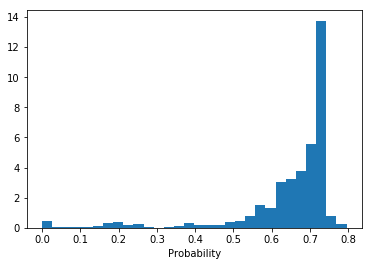

In [11]:
%matplotlib inline
plt.hist(x, normed=True, bins=30)
plt.xlabel('Probability');

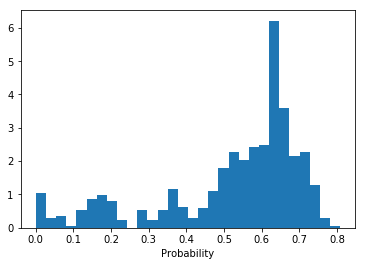

In [12]:
plt.hist(y, normed=True, bins=30)
plt.xlabel('Probability');